In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as m_s_e
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv("imports-85.data",names=cols)
cars.head(5)
num_cols=["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression_ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
cars[num_cols]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


In [2]:
cars=cars.replace("?",np.nan)
#to_convert=list(cars[num_cols].dtypes[cars[num_cols].dtypes!=np.dtype('float64')].index)
float_cars=cars[num_cols].astype(np.dtype('float64'))

In [3]:
float_cars.isnull().sum()
float_cars.dropna(subset=['bore','stroke','compression_ratio','peak-rpm','price'],inplace=True)
float_cars["normalized-losses"].fillna(float_cars["normalized-losses"].mean(),inplace=True)


In [4]:
features=num_cols
features.remove('price')
target='price'
feature_col=float_cars[features]
feature_col

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3.0,121.3,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0
1,3.0,121.3,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0
2,1.0,121.3,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0
5,2.0,121.3,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
6,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
7,1.0,121.3,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
8,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0
10,2.0,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0


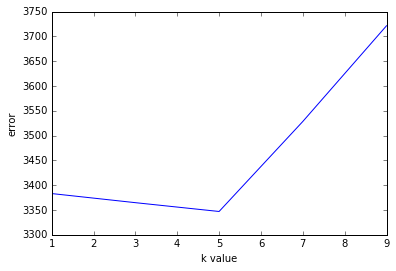

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
target='price'
target_col=float_cars["price"]
def find_optimum_k():
    k_vals=[1,3,5,7,9]
    mse_list=list()
    for k in k_vals:
        knn=KNeighborsRegressor(n_neighbors =k)
        kf = KFold(5, shuffle=True, random_state=1)
        mses = cross_val_score(knn, feature_col, target_col, scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        mse_list.append(avg_rmse)
    
    plt.plot(k_vals,mse_list)
    plt.xlabel("k value")
    plt.ylabel("error")
    plt.show()
    
    
find_optimum_k()

In [6]:
#from the line plot we can see optimum value of k is 5
#Now we have to select relevant features
mse_list=list()
def knn_train_test():
    for col in features:
        knn=KNeighborsRegressor(n_neighbors =5)
        kf = KFold(5, shuffle=True, random_state=1)
        mses = cross_val_score(knn, feature_col[col].reshape(-1,1), float_cars["price"], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmses)
        print(col," ",avg_rmse)
    
knn_train_test()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


symboling   9426.1772674
normalized-losses   6961.96744706
wheel-base   5918.99323043
length   4918.58610366
width   4825.71033401
height   7427.36625263
curb-weight   4432.95049949
engine-size   3179.95467969
bore   6869.56798904
stroke   7021.53860351
compression_ratio   6532.80396584
horsepower   4202.91563382
peak-rpm   7631.29094546
city-mpg   3830.34164476
highway-mpg   4137.04985125


In [9]:
features=feature_col[["highway-mpg","city-mpg","horsepower","curb-weight","engine-size"]]
knn=KNeighborsRegressor(n_neighbors =5)
kf = KFold(5, shuffle=True, random_state=1)
mses = cross_val_score(knn, features, float_cars["price"], scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse=np.mean(rmses)
print(avg_rmse)

3901.67058982
